In [21]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph
from functools import reduce

In [22]:
class AgentState(TypedDict):
    name: str
    values: List[int]
    operation: str
    result: str

In [ ]:
def calculate_data(state: AgentState) -> AgentState:
    """Use this node to calculate based on user's choice"""
    print(state)
    if(state["operation"] == "+"):
        state["result"] = "Hi " + state["name"] +", your answer is " + str(sum(state["values"]))
    
    if(state["operation"] == "*"):
        state["result"] = "Hi " + state["name"] +", your answer is " + str(reduce((lambda x, y: x * y), state["values"]))

    print(state)
    return state


In [29]:
graph = StateGraph(AgentState)
graph.add_node("calculator", calculate_data)
graph.set_entry_point("calculator")
graph.set_finish_point("calculator")

app =graph.compile()


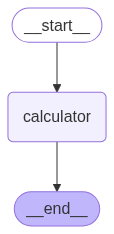

In [30]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
result = app.invoke({
    "name": "Valli",
    "values": [1,4,7,8],
    "operation": "*"
})

print(result["result"])

{'name': 'Valli', 'values': [1, 4, 7, 8], 'operation': '*'}
{'name': 'Valli', 'values': [1, 4, 7, 8], 'operation': '*', 'result': 'Hi Valli, your answer is 224'}
Hi Valli, your answer is 224


In [14]:
from functools import reduce
mylist = [1,3,6,7]
result = reduce((lambda x, y: x * y), mylist)
print("Multiplication of the given list : ", result)

Multiplication of the given list :  126
